{'cluster 1': {0, 1, 2, 3, 5, 6, 9, 10, 12, 13, 15, 18, 21, 23, 27}, 'cluster 2': {4, 7, 8, 11, 16, 17, 19, 20, 22, 24, 25, 26, 29}, 'noise': {28, 14}}


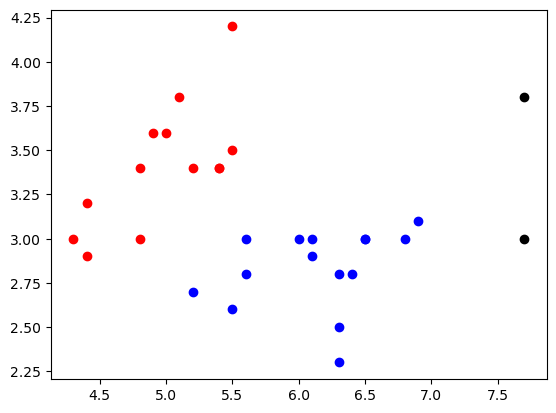

In [179]:
class dbscan:
    eps=None
    minpts=None
    def __init__(self,eps,minpts):
        self.eps=eps
        self.minpts=minpts
    def fit(self,x):
        self.x=x

        def reindex(index,x):
            '''
            index: should be a set that contains index need to be transformed
            x: is a 2-dimension array that is corresponding to 'index'
            Return: a new index set that is corresponidng to self.x
            
            '''
            import numpy as np
            index=list(index)
            new_index=[]
            for item1 in x[index]:
                for i,item2 in enumerate(self.x):
                    if np.all(item1==item2)==True:
                        new_index.append(i)
            return set(new_index)
            
        def round(point_index,x):
            '''
            point_index: should be a scalar as the index of a single data point in 'x'
            x: should be a 2-dimension array of the feature data
            Return: if the point is a core point, return the set of index of data points within the neigghborhood of this core point,
            else return empty set.
            
            '''
            import numpy as np
            point=x[point_index]
            distances=np.sqrt(np.sum((x-np.array(point))**2,axis=1))
            x_index=np.arange(x.shape[0])
            if x[distances<=self.eps].shape[0]>=self.minpts:
                core_point_neighborhood=set(x_index[distances<=self.eps])
            else:
                core_point_neighborhood=set()        
            return core_point_neighborhood
          

        def rounds(x):
            '''
            x: should be a 2-dimension array of the feature data
            return: a dictionary that contains the point-index sets of point within the neighborhood of each core point
            with the index of each core point as the keys.
            
            '''
            import numpy as np
            if x.shape[0]==0:
                return {}
            else:
                x_index=np.arange(x.shape[0])
                result={}
                for point_index in x_index:
                    if round(point_index,x)!=set():
                        result[point_index]=round(point_index,x)
            
                return result
            

        def cluster(x):
            '''
            x: should be a 2-dimension array of the feature data
            return: a set that contains the index of data point in a cluster
            
            '''
            import numpy as np
            core_point_index=np.array(list(rounds(x).keys()))
            if core_point_index.shape[0]==0:# in this case, no point in x is core point
                return set()
            else:
                selected_intial_point_index=np.random.RandomState(123).choice(core_point_index)
                core_points_dict=rounds(x)
                init_point_set=round(selected_intial_point_index,x)
                for core_point,neighborhood_set in core_points_dict.items():
                    if init_point_set&neighborhood_set!=set():
                        init_point_set=init_point_set|neighborhood_set
                return init_point_set
                           
        def delete_points(x):
            '''
            x: should be a 2-dimension array of the feature data
            return: a set of remaining points after deleting the points in a cluster from all data points 
            for the convenience of select an intial point for the next cluster.
        
            '''
            x_index=np.arange(x.shape[0])
            x_set=set(x_index)
            deleted_set=x_set-cluster(x)
            result=x[list(deleted_set)]
            return result
# create the dictionary of each cluster and noise           
        clusters={}
        i=0
        while True:
            i=i+1
            if cluster(x)==set():       
                break
            else:
                clusters[f'cluster {i}']=reindex(cluster(x),x)
                x=delete_points(x)
        all_index=set(np.arange(self.x.shape[0]))
        cluster_point_index={item for subset in list(clusters.values()) for item in subset}
        noise=all_index-cluster_point_index
        clusters['noise']=noise
        self.clustering_result=clusters
                
    def predict(self,x):
        return self.clustering_result
#test
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np
x=load_iris().data
y=load_iris().target
x_index=np.arange(x.shape[0])
x=x[np.random.RandomState(123).choice(x_index,30,replace=False)]
clf=dbscan(1,3)
clf.fit(x)
result=clf.predict(x)
import matplotlib.pyplot as plt
fig,ax=plt.subplots()
ax.scatter(x[list(result['cluster 1'])][:,0],x[list(result['cluster 1'])][:,1],color='blue')
ax.scatter(x[list(result['cluster 2'])][:,0],x[list(result['cluster 2'])][:,1],color='red')
ax.scatter(x[list(result['noise'])][:,0],x[list(result['noise'])][:,1],color='black')
print(result)

array([ 0,  0,  0,  0,  1,  0,  0,  1,  1,  0,  0,  1,  0,  0, -1,  0,  1,
        1,  0,  1,  1,  0,  1,  0,  1,  1,  1,  0, -1,  1], dtype=int64)

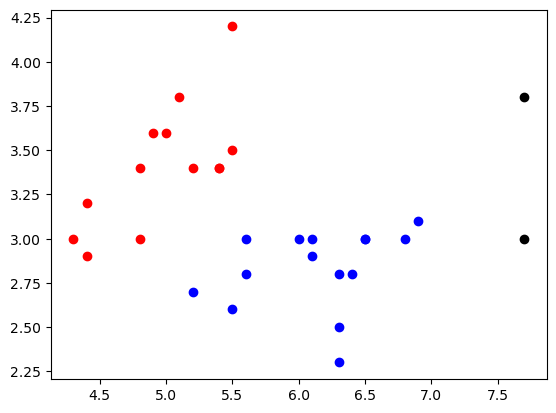

In [181]:
# Show the graph of clustering result of data by sklearn.cluster.DBSCAN()
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.cluster import DBSCAN
import numpy as np
x=load_iris().data
y=load_iris().target
x=x[np.random.RandomState(123).choice(x_index,30,replace=False)]
clf=DBSCAN(eps=1,min_samples=3)
result=clf.fit_predict(x)
import matplotlib.pyplot as plt
fig,ax=plt.subplots()
ax.scatter(x[result==0][:,0],x[result==0][:,1],color='blue')
ax.scatter(x[result==1][:,0],x[result==1][:,1],color='red')
ax.scatter(x[result==-1][:,0],x[result==-1][:,1],color='black')
result